### Scratch book for initial look and working with json files for rock outcrops

Written: 10/03/2023
Last edited: 11/27/2023 (major edit 10/17, transfering most reusable code to outcrop_json_funcs.py)


In [1]:
# run script with package imports and functions so we have access to them while exploring data
%run -i outcrop_json_funcs.py

In [46]:
data

{'sample_name': 'ar_43',
 'slab_image_sd': [None, None],
 'thinny_image_sd': [None, None],
 'local_sd': [297, 39],
 'field_lithology': ' Pink/Brown LS Archaeo  wacke  sometimes epiphyton?',
 'latitude': -30.58390313,
 'longitude': 138.3191856,
 'msl': None,
 'hae': None,
 'gnss_height': None,
 'path_to_ims': '',
 'images': [],
 'geochem_measurements': [{'measurement_name': 'delta13c',
   'unit': 'permil',
   'phase': 'bulk',
   'value': 1.003706960681},
  {'measurement_name': 'sigma_delta13c',
   'unit': '',
   'phase': 'bulk',
   'value': 0.0896879177811916},
  {'measurement_name': 'delta18o',
   'unit': 'permil',
   'phase': 'bulk',
   'value': -7.40454048002001},
  {'measurement_name': 'sigma_delta18o',
   'unit': '',
   'phase': 'bulk',
   'value': 0.163415837256497}],
 'point_counts': []}

In [2]:
#load in the csv file
geochem_df = pd.read_csv('/Users/ryan/Dropbox (Princeton)/reef_survey_project/nevada/data_spreadsheets/geochem/all_geochem.csv')

#make a list of all json files
json_file_list = get_file_list(os.path.join('.','stewarts_mill_grid_samples/'), '*.json')

# make an output directory for adjusted json files
out_path = os.path.join('.','stewarts_mill_grid_samples_fixed_locs/')
if not os.path.exists(out_path):
    os.makedirs(out_path)

In [65]:
# iterate through all the json files
for js in json_file_list:
    # load in the json file
    with open(js, 'r') as f:
        original_data = json.load(f)
        # make a copy of the data
        data_copy = original_data.copy()
        # get the sample number
        sample_num = original_data['sample_name'].split('_')[-1]
        # find all rows in the df with that sample number
        sample_df = geochem_df[geochem_df['sample_num'] == sample_num]
        # if statement to onlyproceed if there is a match
        if len(sample_df) > 0:
            # clear the geochem_measurements field
            data_copy['geochem_measurements'] = []
            # iterate through the rows in the df
            num_localities = len(sample_df)
            num_measurements = len(original_data['geochem_measurements'])/num_localities
            for i in range(num_localities):
                these_measurements = original_data['geochem_measurements'][int(i*num_measurements):int(i*num_measurements+num_measurements)]
                # only prceed if there is a delta13c measurement in these_measurements otherwise try Mg_Ca
                these_measurement_names = [s['measurement_name'] for s in these_measurements]
                delta_c_ind = string_find('delta13c',these_measurement_names)
                mgca_ind = string_find('Mg_Ca',these_measurement_names)
                if these_measurements[delta_c_ind[0]]['value']:
                    # find the row in the dataframe that has the closest delta13c value
                    closest_row = sample_df.iloc[(sample_df['delta_13C_mean']-these_measurements[delta_c_ind[0]]['value']).abs().argsort()[:1]]
                else:
                    # find the row in the dataframe that has the closest Mg_Ca value
                    closest_row = sample_df.iloc[(sample_df['Mg_Ca']-these_measurements[mgca_ind[0]]['value']).abs().argsort()[:1]]
                # now take the im_row and im_col from that row and put in the im_loc field of the json, deviding im_row by 10652 and im_col by 14204
                for m in these_measurements:
                    m['im_loc'] = [float(closest_row['im_row'])/10652,float(closest_row['im_col'])/14204]

                # put these measurements in the data_copy
                data_copy['geochem_measurements'].append(these_measurements)
        # write the data_copy to a new json file
        out_file = os.path.join(out_path,js.split('/')[-1])
        with open(out_file, 'w') as outfile:
            json.dump(data_copy, outfile,indent=4)

/var/folders/qk/97xc1gd11gg4zbv3gl0wpwk80000gn/T/ipykernel_76612/2769108227.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  m['im_loc'] = [float(closest_row['im_row'])/10652,float(closest_row['im_col'])/14204]
/var/folders/qk/97xc1gd11gg4zbv3gl0wpwk80000gn/T/ipykernel_76612/2769108227.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  m['im_loc'] = [float(closest_row['im_row'])/10652,float(closest_row['im_col'])/14204]
/var/folders/qk/97xc1gd11gg4zbv3gl0wpwk80000gn/T/ipykernel_76612/2769108227.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  m['im_loc'] = [float(closest_row['im_row'])/10652,float(closest_row['im_col'])/14204]
/var/folders/qk/97xc1gd11gg4zbv3gl0wpwk80000gn/T/ipykernel

In [33]:
file_list = get_file_list(os.path.join('.','stewarts_mill_grid_samples/'))
print(file_list)


['./stewarts_mill_grid_samples/smg_18.json', './stewarts_mill_grid_samples/smg_59.json', './stewarts_mill_grid_samples/smg_22.json', './stewarts_mill_grid_samples/smg_157.json', './stewarts_mill_grid_samples/smg_75.json', './stewarts_mill_grid_samples/smg_100.json', './stewarts_mill_grid_samples/smg_63.json', './stewarts_mill_grid_samples/smg_116.json', './stewarts_mill_grid_samples/smg_34.json', './stewarts_mill_grid_samples/smg_141.json', './stewarts_mill_grid_samples/smg_136.json', './stewarts_mill_grid_samples/smg_43.json', './stewarts_mill_grid_samples/smg_161.json', './stewarts_mill_grid_samples/smg_14.json', './stewarts_mill_grid_samples/smg_120.json', './stewarts_mill_grid_samples/smg_55.json', './stewarts_mill_grid_samples/smg_08a.json', './stewarts_mill_grid_samples/smg_2.json', './stewarts_mill_grid_samples/smg_96.json', './stewarts_mill_grid_samples/smg_79.json', './stewarts_mill_grid_samples/smg_80.json', './stewarts_mill_grid_samples/smg_38.json', './stewarts_mill_grid_sa

In [34]:
# example of taking a jmicro vision csv and converting it to a dictionary
coord_path = '/Users/ryan/Dropbox (Princeton)/reef_survey_project/nevada/data_spreadsheets/point_counts/smg_excel_exports/smg_1_Point Counting_random-350_coordinates.csv'
coords_for_dict = jmicro_to_dict(coord_path, 5000, 3800, delimiter=';')
print(coords_for_dict)

[{'class': None, 'x_position': 0.43165888888888887, 'y_position': 0.8492660818713449}, {'class': 'Microb', 'x_position': 0.34205333333333326, 'y_position': 0.3593691520467836}, {'class': None, 'x_position': 0.7298266666666666, 'y_position': 0.7816812865497076}, {'class': None, 'x_position': 0.027234444444444443, 'y_position': 0.03852704678362573}, {'class': 'Microb', 'x_position': 0.25216555555555553, 'y_position': 0.41748464912280703}, {'class': 'Mi', 'x_position': 0.22302611111111115, 'y_position': 0.3250197368421052}, {'class': 'Mi', 'x_position': 0.641491111111111, 'y_position': 0.5265672514619882}, {'class': None, 'x_position': 0.9876366666666665, 'y_position': 0.3319824561403509}, {'class': None, 'x_position': 0.8516055555555555, 'y_position': 0.9054320175438596}, {'class': None, 'x_position': 0.010159999999999999, 'y_position': 0.33857383040935674}, {'class': 'Mi', 'x_position': 0.5426427777777777, 'y_position': 0.7250511695906432}, {'class': None, 'x_position': 0.10731499999999

In [42]:
# going to read in all csv files of point counts, convert to dictionaries, and put in a list
# and write them to their corresponding json files
# the csv directory
csv_dir = '/Users/ryan/Dropbox (Princeton)/reef_survey_project/nevada/data_spreadsheets/point_counts/smg_excel_exports/'
input_json_dir = '/Users/ryan/Dropbox (Princeton)/code/master_json/stewarts_mill_grid_samples_fixed_locs/'

# and an output directory for the json files
output_json_dir = '/Users/ryan/Dropbox (Princeton)/code/master_json/stewarts_mill_grid_samples_fixed_locs_point_counts/'

# make the output directory if it doesn't exist
if not os.path.exists(output_json_dir):
    os.makedirs(output_json_dir)

# get a list of all the csv files
csv_files = get_file_list(csv_dir, '*coordinates.csv')

# iterate through the csv files
for csv_file in csv_files:
    # get the sample number
    sample_num = csv_file.split('/')[-1].split('_')[0]+'_'+csv_file.split('/')[-1].split('_')[1]
    # get the corresponding json file
    json_file = get_file_list(input_json_dir, sample_num+'.json')
    # only proceed if there is a match
    if len(json_file) > 0:
        # convert the csv to a dictionary
        csv_dict = jmicro_to_dict(csv_file, 14204*0.35277778, 10652*0.35277778, delimiter=';')
        # load in the json file
        with open(json_file[0], 'r') as f:
            original_data = json.load(f)
            # make a copy of the data
            data_copy = original_data.copy()
            # clear the point_counts field, replacing it with the csv_dict
            data_copy['point_counts'] = csv_dict
        # write the data_copy to a new json file
        out_file = os.path.join(output_json_dir,json_file[0].split('/')[-1])
        with open(out_file, 'w') as outfile:
            json.dump(data_copy, outfile,indent=4)

In [40]:
sample_num

'smg'

In [2]:
# start playing with granulometry based upon some matlab code
# just going to work with smg_7 for now
# read in the json
json_folder = os.path.join('.','stewarts_mill_grid_samples/')
f = open(json_folder + 'smg_7.json')
sample_json = json.load(f)

# find the images where the light source is reflectance or fluorescence
reflect_inds = [i for i, d in enumerate(sample_json['images']) if d['light_source'] == 'reflectance']
fluor_inds = [i for i, d in enumerate(sample_json['images']) if d['light_source'] == 'fluorescence']

# read in the first reflectance image
multispec_im = io.imread(sample_json['path_to_ims'] + sample_json['images'][reflect_inds[0]]['file_name']).astype(float)

# read in and append the remaining reflectance images
for ind in reflect_inds[1:]:
    multispec_im = np.dstack((multispec_im,io.imread(sample_json['path_to_ims'] + sample_json['images'][ind]['file_name']).astype(float)))

# read the fluorescence image into the multispec_im
for ind in fluor_inds:
    multispec_im = np.dstack((multispec_im,io.imread(sample_json['path_to_ims'] + sample_json['images'][ind]['file_name']).astype(float)))

# read in the mask and cover up the masked pixels
mask_ind = [i for i, d in enumerate(sample_json['images']) if d['tag'] == 'boundary_mask']
mask_im = io.imread(sample_json['path_to_ims'] + sample_json['images'][mask_ind[0]]['file_name'], plugin='pil')



/Users/ryan/miniconda3/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (151301008 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [3]:
# reshape the multispec_im to be a 2d array with the number of bands as the last dimension
column_im = np.reshape(multispec_im, (multispec_im.shape[0]*multispec_im.shape[1], multispec_im.shape[2]))
column_mask = np.reshape(mask_im, (mask_im.shape[0]*mask_im.shape[1], 1))

# prep the column im for pca by removing the masked pixels and normalizing the columns
column_im = column_im[column_mask[:,0] == 255,:]
scaler = StandardScaler()
scaler.fit(column_im)
column_im = scaler.transform(column_im)

# now perform a pca on the column image, masking out the pixels that are masked in the mask image
im_pca = PCA(n_components=column_im.shape[1])
pc_scores = im_pca.fit_transform(column_im)

# put the nans back in the pc scores and shape back into an image
pc_image = np.zeros((column_mask.shape[0], pc_scores.shape[1]))
pc_image[column_mask[:,0] == 255,:] = pc_scores
pc_image = np.reshape(pc_image, (multispec_im.shape[0], multispec_im.shape[1], pc_scores.shape[1]))


In [4]:
# now we can play with granulometry on the first channel of the pc image
# first, we need to rescale the image to be between 0 and 1
grain_im_raw = pc_image[:,:,0]
grain_im_raw = (grain_im_raw - np.min(grain_im_raw))/(np.max(grain_im_raw) - np.min(grain_im_raw))

# do adaptive histogram equalization on the image
grain_im_adapteq = exposure.equalize_adapthist(grain_im_raw, clip_limit=0.03)

In [5]:
# define an arbitrary set of radii to use for the granulometry
grain_radii = np.linspace(10, 500, 10)

# and we'll actually resize the image in stead of changing the radius of the structuring element
strel_radius = 5 # pixels
resizes = strel_radius/grain_radii

# because the grains are dark here, we need to invert the image
grain_im_adapteq = 1 - grain_im_adapteq


In [6]:
# now we can loop through the radii and perform the granulometry
# set up an empty volume to hold an opened image for each radius

opened_vols = np.zeros((rescale(grain_im_adapteq,resizes[0]).shape[0], rescale(grain_im_adapteq,resizes[0]).shape[1], len(grain_radii)))
for res in resizes:
    # resize the image
    grain_im_resized = downscale_local_mean(grain_im_adapteq, (round(1/res), round(1/res)))
    # create a disk structuring element with the first, smallest radius
    selem = ellipse(strel_radius, strel_radius)
    # open the image with the structuring element
    opened_im = opening(grain_im_resized, selem)
    # resize the opened image back to the original size
    opened_im = resize(opened_im, rescale(grain_im_adapteq,resizes[0]).shape, anti_aliasing=True)
    # add the opened image to the opened_vols volume
    opened_vols[:,:,np.where(resizes == res)[0][0]] = opened_im

In [7]:
# the raw detected grains are the differences between successive openings
raw_grains = np.diff(opened_vols, axis=2)

# now we want to loop through the raw grains, binarize those images  and perform a watershed
# on the binarized image
# set up an empty volume to hold the segmented grains and watershed grains
segmented_grains = np.zeros((raw_grains.shape[0], raw_grains.shape[1], raw_grains.shape[2]), dtype=bool)
watershed_grains = np.zeros((raw_grains.shape[0], raw_grains.shape[1], raw_grains.shape[2]))
for i in range(raw_grains.shape[2]):
    thresh = threshold_otsu(raw_grains[:,:,i])
    segmented_grains[:,:,i] = raw_grains[:,:,i] < thresh

    # now we can perform the watershed
    # first, we need to find the distance transform of the segmented grains
    distance = ndi.distance_transform_edt(segmented_grains[:,:,i])
    # now we can perform the watershed
    local_maxi = peak_local_max(distance, min_distance=math.floor(grain_radii[i]/strel_radius), labels=(segmented_grains[:,:,i]))
    peak_mask = np.zeros(distance.shape, dtype=bool)
    peak_mask[tuple(local_maxi.T)] = True
    markers, _ = ndi.label(peak_mask)

    watershed_grains[:,:,i] = watershed(-distance, markers, mask=segmented_grains[:,:,i])

/var/folders/qk/97xc1gd11gg4zbv3gl0wpwk80000gn/T/ipykernel_23306/3202564621.py:9: RuntimeWarning: invalid value encountered in divide
  alphed_image = (alphed_image - np.min(alphed_image))/(np.max(alphed_image) - np.min(alphed_image))


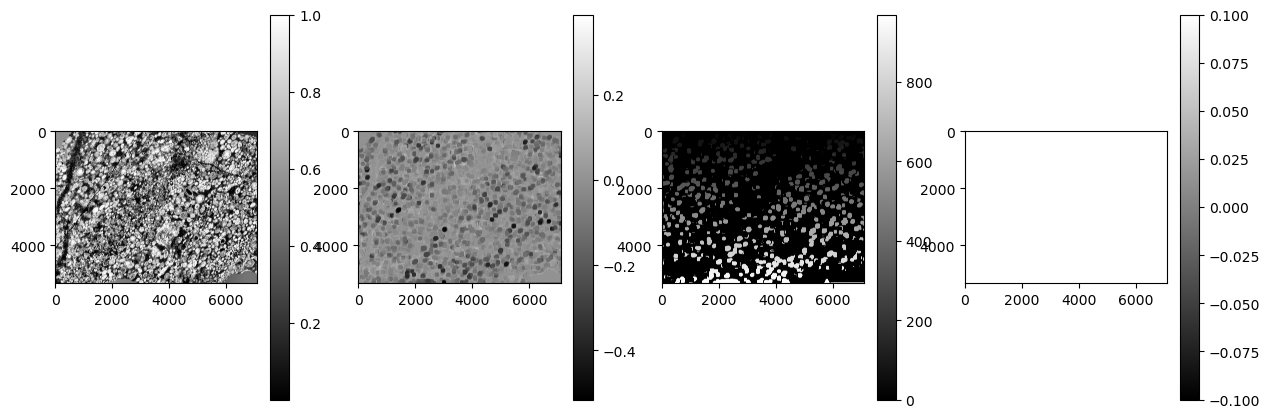

In [8]:
rind = 2
alph = 0.5
fig, axs = plt.subplots(1,4, figsize=(15,5))
im1 = axs[0].imshow(downscale_local_mean(grain_im_adapteq, (round(1/resizes[0]), round(1/resizes[0]))), cmap='gray')
im2 = axs[1].imshow(raw_grains[:,:,rind], cmap='gray')
im3 = axs[2].imshow(watershed_grains[:,:,rind], cmap='gray')
alphed_image = np.ubyte(downscale_local_mean(grain_im_adapteq, (round(1/resizes[0]), round(1/resizes[0]))) * alph + (1-alph)*raw_grains[:,:,rind])
# rescale the image to be between 0 and 1
alphed_image = (alphed_image - np.min(alphed_image))/(np.max(alphed_image) - np.min(alphed_image))
im4 = axs[3].imshow(alphed_image, cmap='gray')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
fig.colorbar(im3, ax=axs[2])    
fig.colorbar(im4, ax=axs[3])